## Методы машинного обучения без учителя и предварительная обработка данных

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles, make_moons, load_iris, load_breast_cancer, fetch_lfw_people, load_digits
plt.rc('font', family='Verdana')
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE

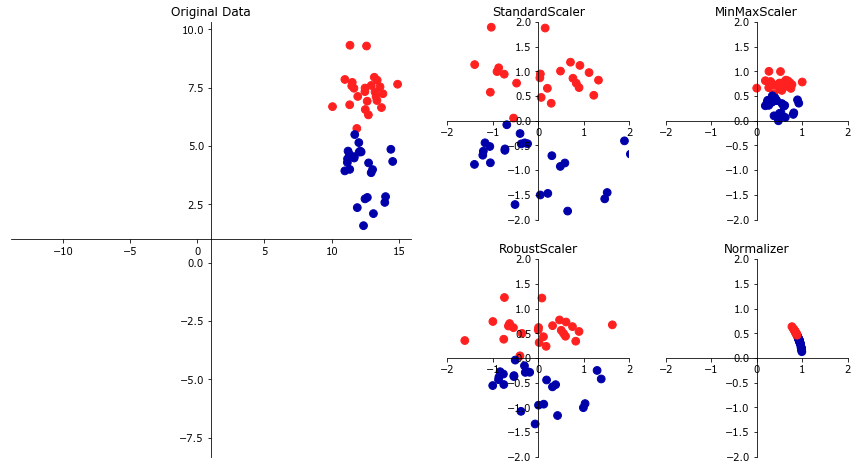

In [2]:
# способы масштабирования и предварительной обработки данных
mglearn.plots.plot_scaling()

<h3 style="color: green;">Применение преобразований данных</h3>

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
scaler = MinMaxScaler()

C помощью fit() мы подгоняем объект scaler на обучающих данных. MinMaxScaler.fit вычисляет минимальное и максимальное значения каждого признака. В отличии классификаторов и регрессоров fit() обрабатывает исходные данные.

In [9]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
# преобразование данных
X_train_scaled = scaler.transform(X_train)
print("форма преобразованного массива: {}".format(X_train_scaled.shape))
print("min значение признака до масштабирования:\n {}".format(X_train.min(axis=0)))
print("max значение признака до масштабирования:\n {}".format(X_train.max(axis=0)))
print("min значение признака после масштабирования:\n {}".format(X_train_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n {}".format(X_train_scaled.max(axis=0)))

форма преобразованного массива: (426, 30)
min значение признака до масштабирования:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
max значение признака до масштабирования:
 [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
min значение признака после масштабирования:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max значение признака после масштабирования:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1

In [16]:
# как видно ниже тестовые набор данных масштабировалось по-другому.
X_test_scaled = scaler.transform(X_test)
print("min значение признака после масштабирования:\n {}".format(X_test_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n {}".format(X_test_scaled.max(axis=0)))

min значение признака после масштабирования:
 [ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
max значение признака после масштабирования:
 [0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


<h3 style="color: green;">Масштабирование обучающего и тестового наборов одинаковым образом</h3>

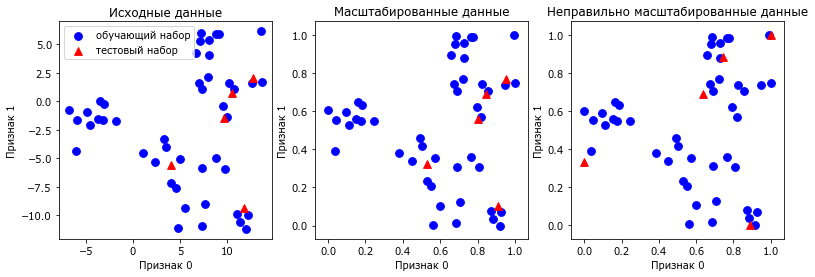

In [30]:
# создаём синтетические данные 
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# разбиваем их на обучающий и тестовый набор
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# размещаем на графике обучающий и тестовый наборы
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c='blue', label="обучающий набор", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c='red', label="тестовый набор", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Исходные данные")

# масштабируем данные с помощью MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# визуализируем правильно масштабированные данные
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='blue', label="обучающий набор", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker="^", c='red', label="тестовый набор", s=60)
axes[1].set_title("Масштабированные данные")

# масштабируем тестовый набо отдельно, чтобы в тестовом наборе min значение каждого признака было
# равно 0, а max значение каждого признака равнялось 1.
# НЕ ДЕЛАТЬ ТАК! только в ознокомительных целях
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaler_badly = test_scaler.transform(X_test)

# визуализируем неправильно масштабированные данные
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='blue', label="обучающий набор", s=60)
axes[2].scatter(X_test_scaler_badly[:, 0], X_test_scaler_badly[:, 1], marker="^", c='red', label="тестовый набор", s=60)
axes[2].set_title("Неправильно масштабированные данные")

for ax in axes:
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")

<h3 style="color: green;">Влияние предварительной обработки на машинное обучение с учителем</h3>

In [9]:
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(kernel='rbf', C=100, gamma=0.1)
svm.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(svm.score(X_test, y_test)))

Правильность на тестовом наборе: 0.63


In [10]:
# отмасшатибирум преждем чем сделать подгонку под SVC модели
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# построение SVM модели для масштабированных обучающих данных
svm.fit(X_train_scaler, y_train)

# оценка правильности для масштабированного тестового набора
print("Правильность на масштабированном тестовом наборе: {:.2f}".format(svm.score(X_test_scaler, y_test)))

Правильность на масштабированном тестовом наборе: 0.97


## Снижение размерности, выделение признаков и множественное обучение

<h3 style="color: green;">Анализ гланых компонент (PCA)</h3>

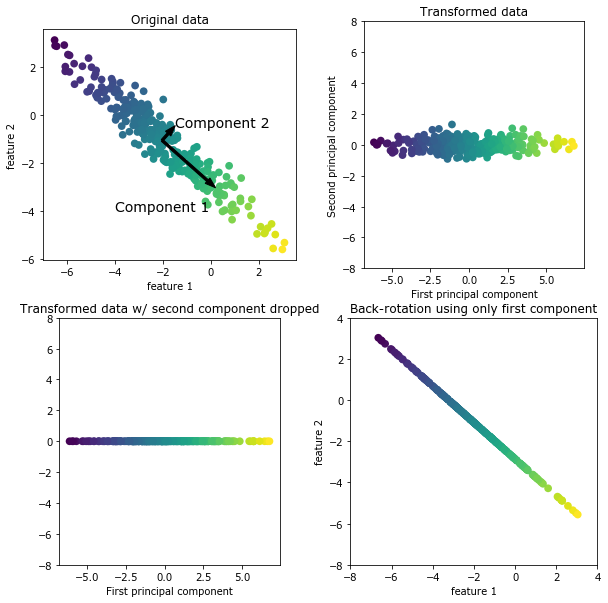

In [11]:
# результат применения метода PCA к синтетическому двумерному массиву данных
mglearn.plots.plot_pca_illustration()

<h3 style="color: red;">Применение метода PCA к набору данных cancer для визуализации</h3>

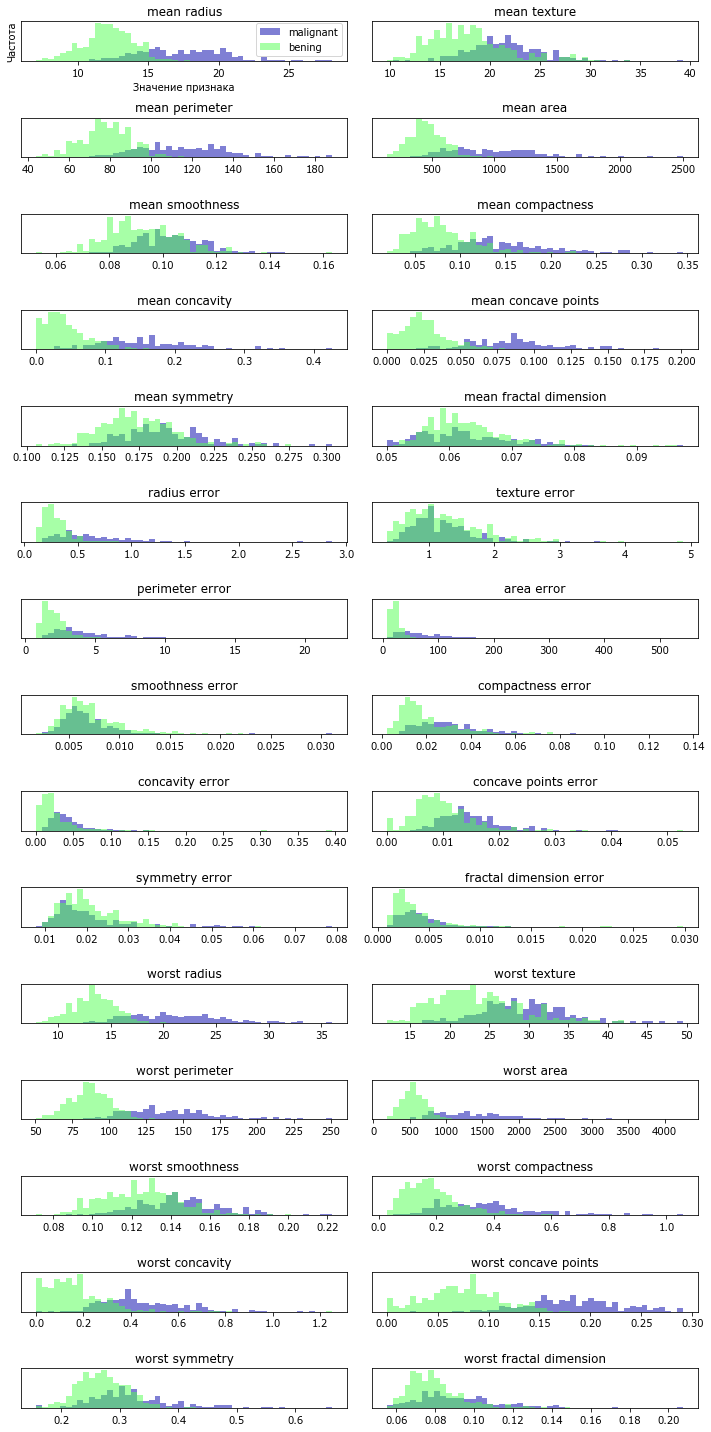

In [13]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
bening = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(bening[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Значение признака")
ax[0].set_ylabel("Частота")
ax[0].legend(["malignant", 'bening'], loc="best")
fig.tight_layout()

In [18]:
# перед тем как применить PCA, следует отмасштабировать данные таким образом, чтобы каждый признак 
# имел единичную дисперсию
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

По умолчанию PCA лишь поворачивает и смещает данные, но сохранает все главные компоненты. Чтобы уменьшить размерность данных, нам нужно указать, сколько компонент мы хотим сохранить при создании объекта класса PCA

In [22]:
# оставляем первые две главные компоненты
pca = PCA(n_components=2)
# подгоняем модель PCA на наборе данных breast cancer
pca.fit(X_scaled)

# сокращаем размерность данных до двух главных компонент
X_pca = pca.transform(X_scaled)
print("Форма исходного массива: {}".format(str(X_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))

Форма исходного массива: (569, 30)
Форма массива после сокращения размерности: (569, 2)


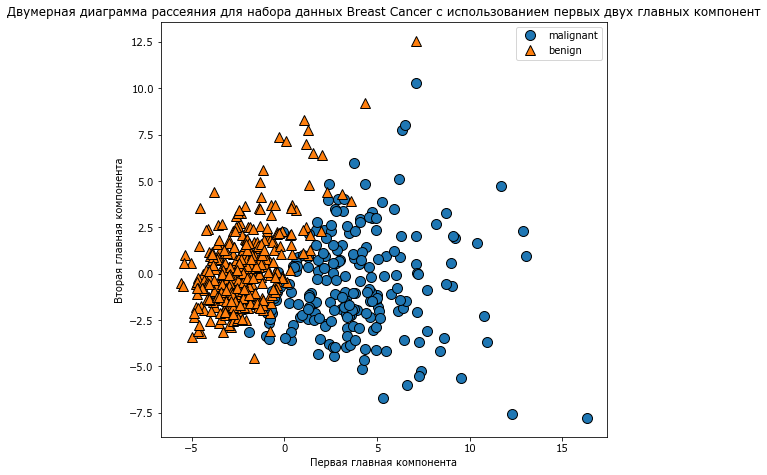

In [31]:
# построение графика двух главных компонент
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0 ], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.title("Двумерная диаграмма рассеяния для набора данных Breast Cancer с использованием первых двух главных компонент")
plt.show()

In [32]:
print("Компоненты PCA: \n{}".format(pca.components_))

Компоненты PCA: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


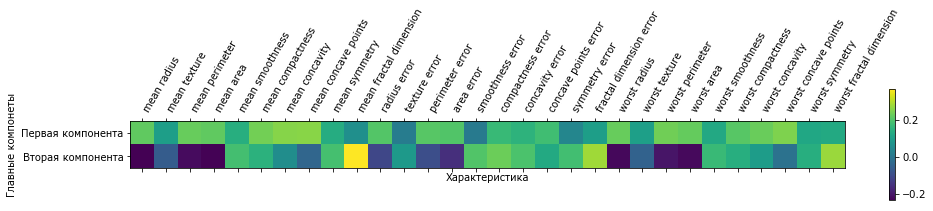

In [37]:
# Тепловая карта первых двух главных компонент для набора данных Breast Cancer
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["Первая компонента", "Вторая компонента"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Характеристика")
plt.ylabel("Главные компонеты")
plt.show()

<h3 style="color: red;"> Метод "собственных лиц" (eigenface) для выделения характеристик</h3>

Выделение признаков к изображениям с помощью метода PCA. Воспользуемся набором данных Labeled Faces in the Wild

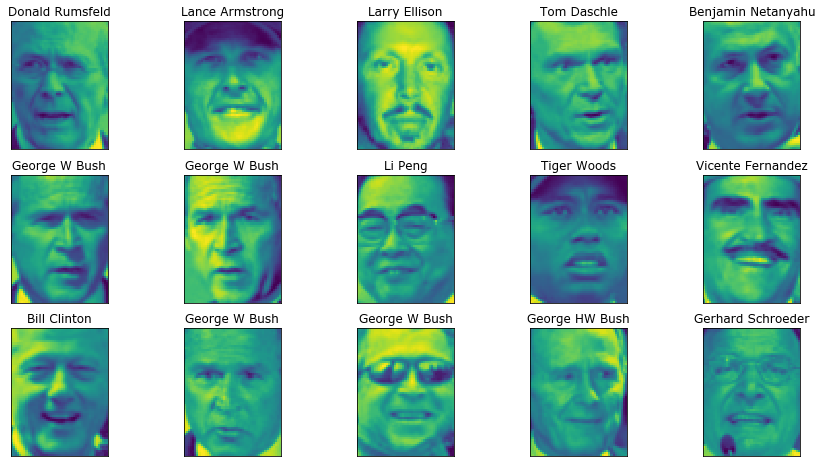

In [6]:
people = fetch_lfw_people()
image_shape = people.images[0].shape

fix, axes = plt.subplots(3, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [7]:
print("Форма массива изображений лиц: {}".format(people.images.shape))
print("Колличество классов: {}".format(len(people.target_names)))

Форма массива изображений лиц: (1518, 62, 47)
Колличество классов: 153


In [8]:
# как часто встречаются одни и теже люди
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 2 == 0:
        print()

Abdul Rahman                1   Alan Greenspan              5   
Alex Barros                 2   Anjum Hussain               1   
Ann Veneman                11   Arminio Fraga               6   
Atal Bihari Vajpayee       24   Audrey Sauret               1   
Benjamin Netanyahu          5   Bill Clinton               29   
Bill McBride               10   Bill Sizemore               2   
Bison Dele                  1   Bob Beauprez                2   
Bob Graham                  6   Bob Huggins                 4   
Bono                        3   Brandon Robinson            1   
Brian Jordan                1   Cabas                       1   
Carlos Vives                4   Casy Preslar                1   
Charlie Zaa                 2   Chris Gratton               1   
Christopher Reeve           4   Ciro Gomes                  5   
Colin Montgomerie           5   Curtis Strange              1   
Daniela Cicarelli           1   Darren Clarke               2   
David Caruso             

In [9]:
# чтобы данные стали менее асимметричными, будем рассматривать не более 50 изображений
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# для получения большей стабильности масштабируем шкалу оттенков серого, так чтобы значения были от 0 до 1
# вместо использования шкалы значений от 0 до 255
X_people = X_people / 255

Попробуем классифицировать наши изображения

In [10]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0)
# строим KNeighborsClassfier с одним ближайшим соседом
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Правильность на тестовом наборе для 1-nn: {:.4f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе для 1-nn: 0.1733


In [11]:
# использование метода PCA со 100 компонентами
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Обучающие данные после PCA: {}".format(X_train_pca.shape))

Обучающие данные после PCA: (673, 100)


In [12]:
# новые данные содержат 100 новых признаков,первые 100 главных компонент.
# снова применим knn
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Правильность на тестовом наборе для 1-nn: {:.4f}".format(knn.score(X_test_pca, y_test)))

Правильность на тестовом наборе для 1-nn: 0.2311


Правильность увеличалась весьма значительно, с 17% до 23%, это подтверждает предположение о том, что главные компоненты могут дать лучшее представление данных.

In [13]:
# просмотр первых несколько главных компонент
print("Форма pca.components_: {}".format(pca.components_.shape))

Форма pca.components_: (100, 2914)


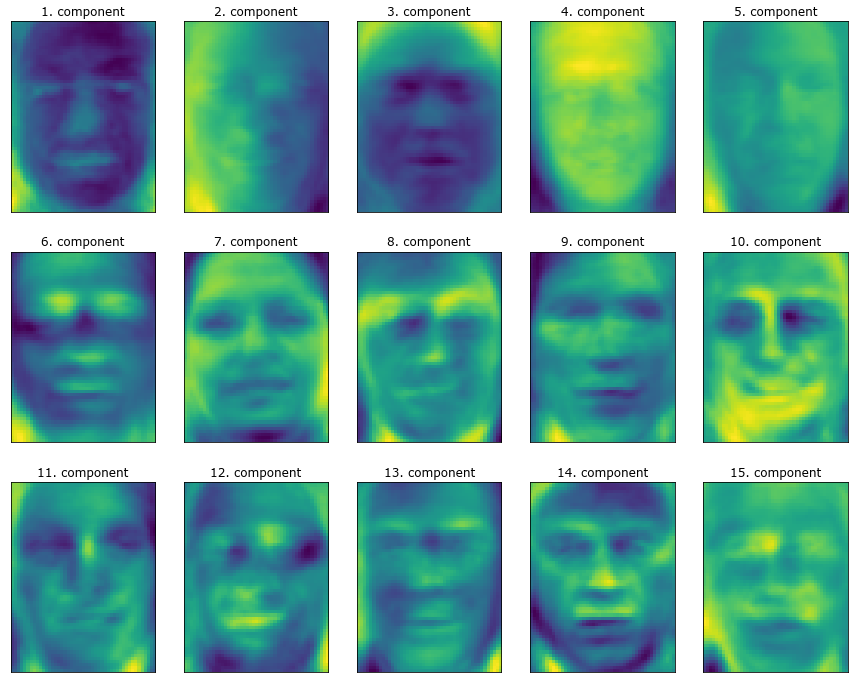

In [14]:
# визуализируем компоненты
fix, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

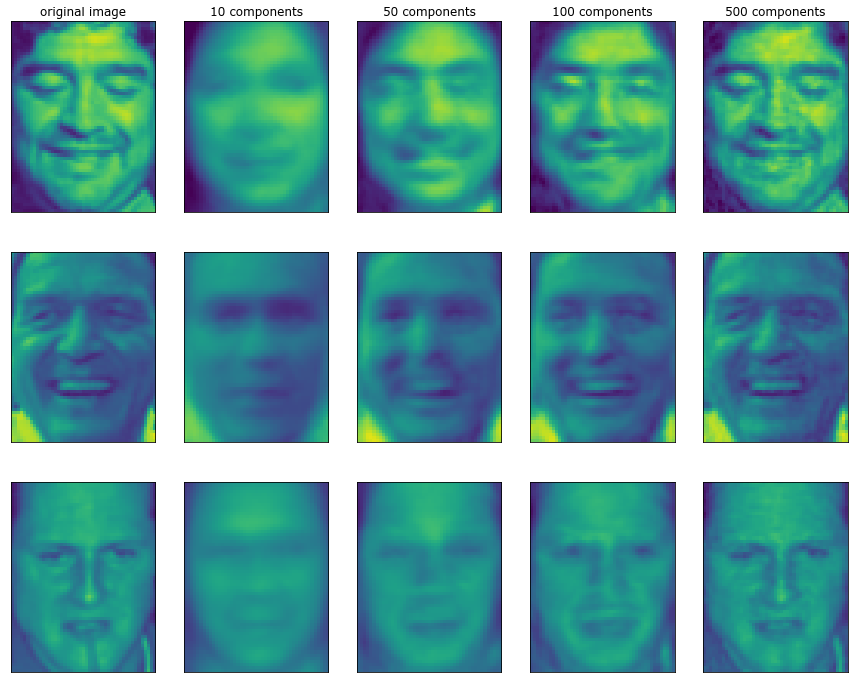

In [15]:
# простая визуализация результатов реконструкции некоторых лиц, используя 10, 50, 100 или 500 компонентов
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

IndexError: list index out of range

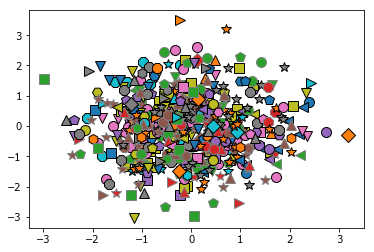

In [16]:
# диаграмма рассеяния для набор лиц, использующая первые две главныые компоненты
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

<h3 style="color: green;">Факторизация неотрицательных матриц (NMF)</h3>

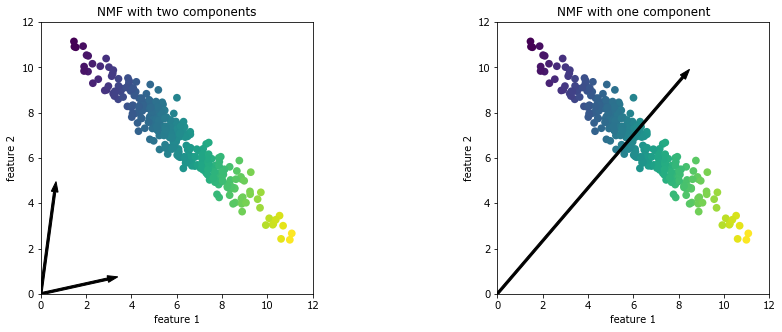

In [17]:
#Применение метода NMF к синтетическим данным
mglearn.plots.plot_nmf_illustration()

<h3 style="color: red;"> Применение NMF к изображениям лиц</h3>

In [ ]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

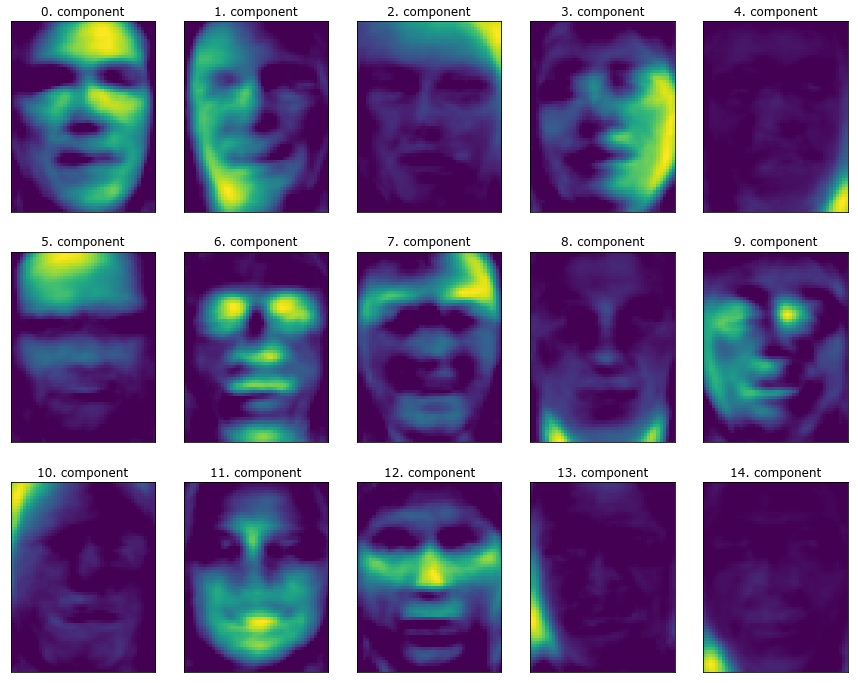

In [21]:
# компоненты найденные по методу NMF для набора лиц (использовалось 15 компонент)
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

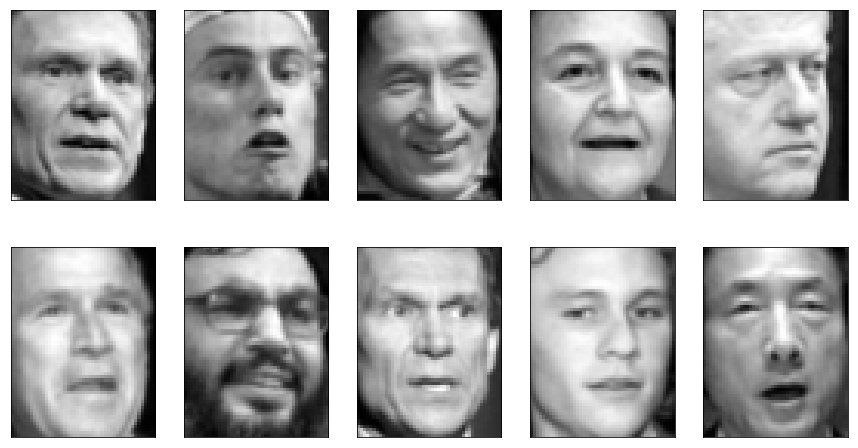

In [26]:
# видим на изображениях сверху паттерн поведения
# компонент 0 = лицо больше повёрнуто вправо
# компонент 1,3 = лицо больше повёрнуто влево
comp = 0
# сортируем по 0-й компоненте, выводим первые 10 изображений
inds = np.argsort(X_train_nmf[:, comp])[::-1]
fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape), cmap='gray')

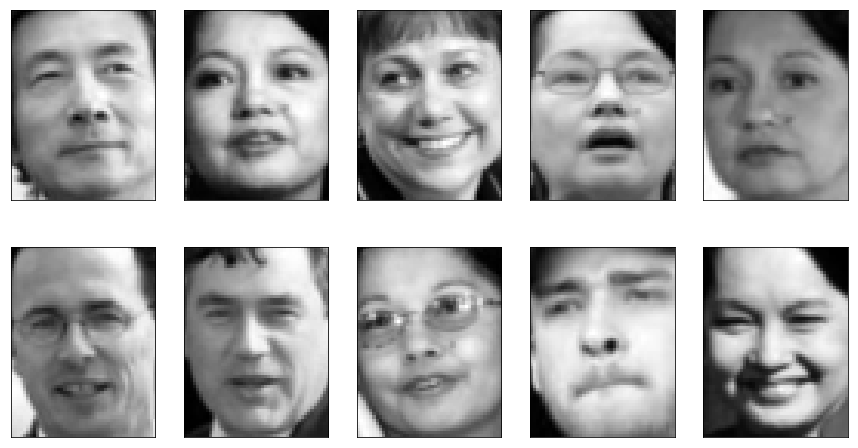

In [25]:
comp = 3
# сортируем по 3-й компоненте, выводим первые 10 изображений
inds = np.argsort(X_train_nmf[:, comp])[::-1]
fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape),  cmap='gray')

Text(0, 0.5, 'Signal')

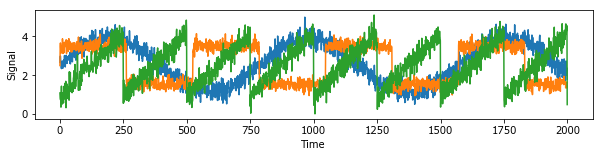

In [37]:
# абстрактный пример: допустим интересует сигнал, который представляет собой комбинацию трёх различных источников
S = mglearn.datasets.make_signals()
plt.figure(figsize=(10,2))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [44]:
# к сожалению, мы не можем наблюдать не сами исходные сигналы, а лишь аддитивную смесь (сумму) всех трёх сигналов
# нужно фиксировать характеристики смешанного сигнала (скажем имеет 100 измерительных приборов)
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print(X.shape)

(2000, 100)


In [45]:
# можем использовать метод NMF, чтобы восстановить 3 сигнала
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Форма восстановления сигнала: {}".format(S_.shape))

Форма восстановления сигнала: (2000, 3)


In [52]:
# для сравнения применим метод PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)
print(H.shape)

(2000, 3)


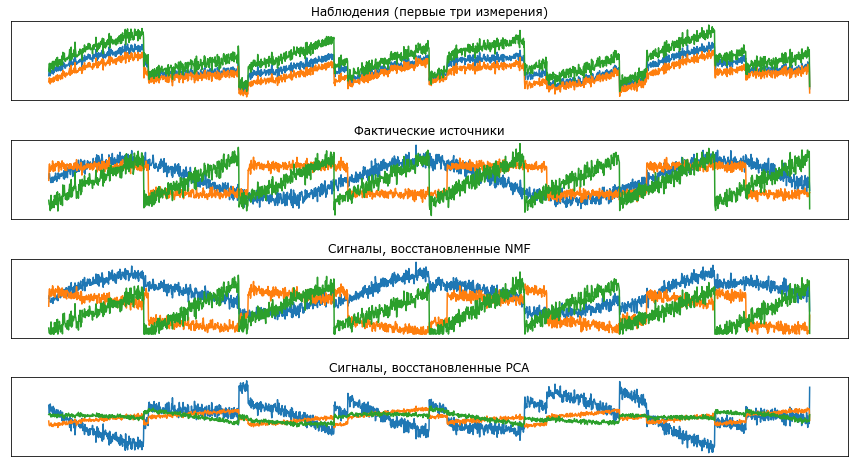

In [65]:
# Восстановление первоначальных источников с помощью NMF & PCA
models = [X, S, S_, H]
names = ["Наблюдения (первые три измерения)", "Фактические источники", "Сигналы, восстановленные NMF", "Сигналы, восстановленные PCA"]
fig, axes = plt.subplots(4, figsize=(15, 8), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

<h3 style="color: green;">Множественное обучение с помощью алгоритма t-SNE</h3>

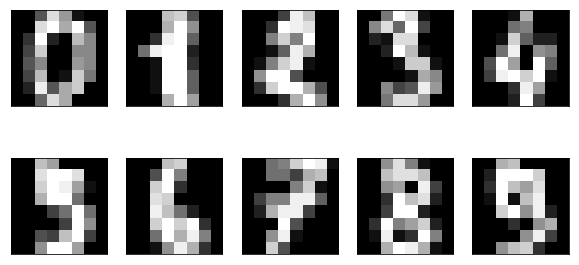

In [87]:
# применение алгоритма к рукописным цифрам из sklearn
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10,5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap='gray')

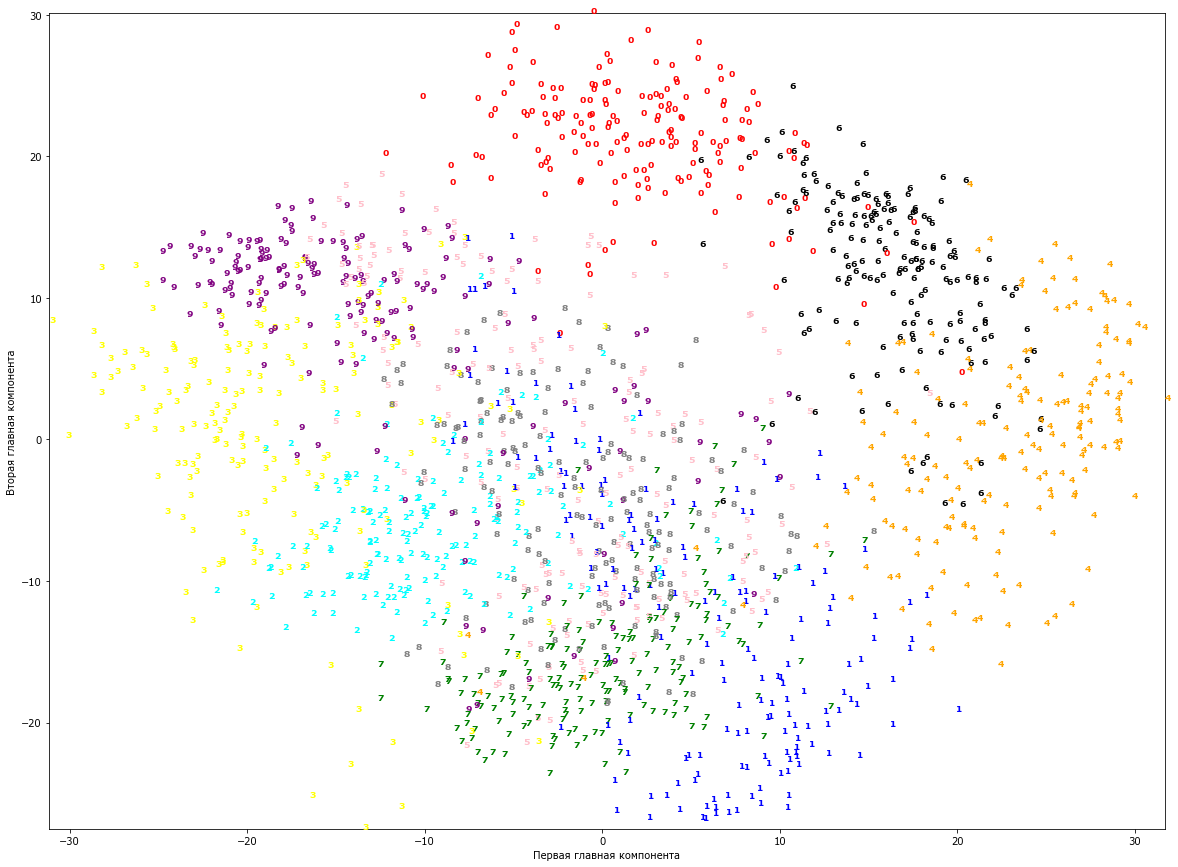

In [99]:
# использование метода PCA для визуализации этих данных
pca = PCA(n_components=2)
pca.fit(digits.data)
# преобразуем данные рукописных цифр до первых двух компонент
digits_pca = pca.transform(digits.data)
colors = ['red', 'blue', 'cyan', 'yellow', 'orange', 'pink', 'black', 'green', 'gray', 'purple']
plt.figure(figsize=(20, 15))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # строим график - цифры представлены символами вместо точек
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.show()

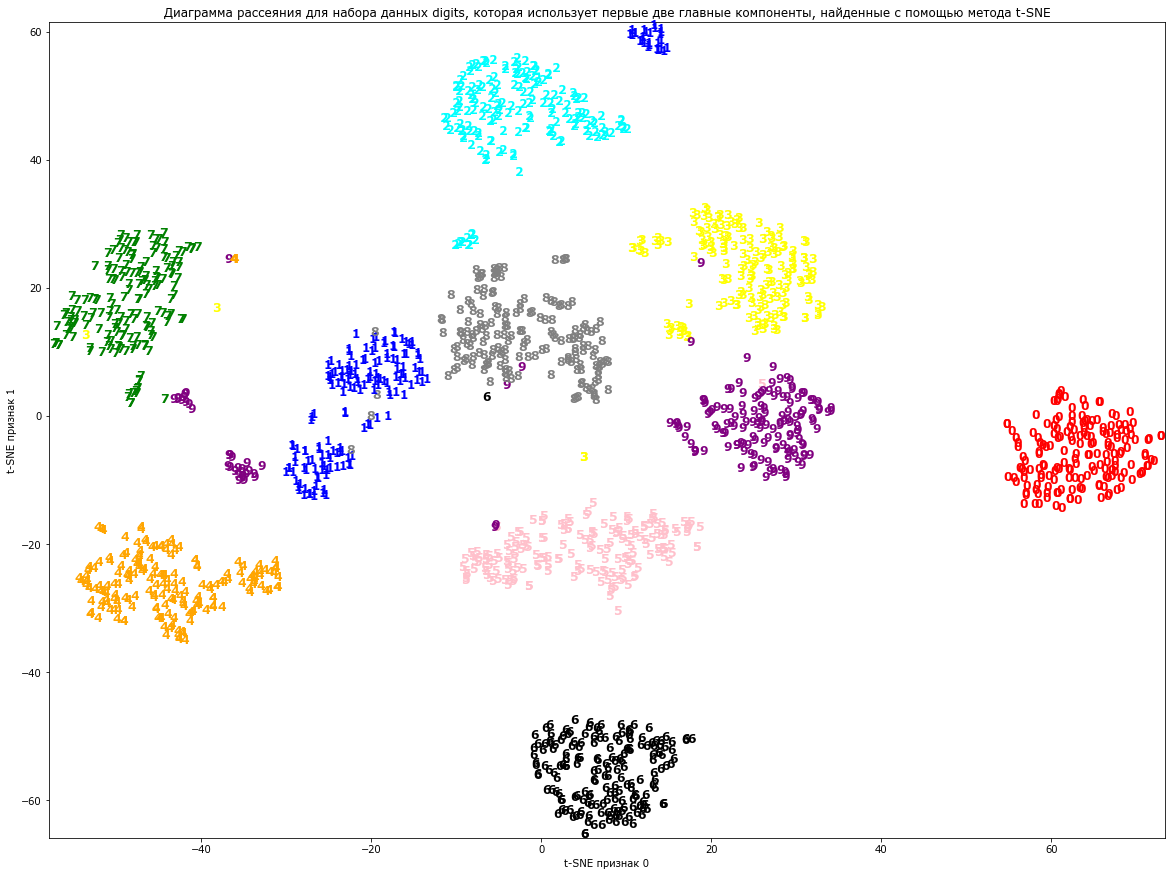

In [103]:
# использование метода TSNE для визуализации этих данных
tsne = TSNE(random_state=42)
# используем fit_transform
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(20, 15))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # строим график - цифры представлены символами вместо точек
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 12})

plt.xlabel("t-SNE признак 0")
plt.ylabel("t-SNE признак 1")
plt.title("Диаграмма рассеяния для набора данных digits, которая использует первые две главные компоненты, найденные с помощью метода t-SNE")
plt.show()

## Кластерицазия